In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

AIM : Plot the best fit line (Error must be minimum)\
    1. Dataset \
    2. Divide the features based on independent and dependent features (Independent : weight, Dependent : height)\
    3. Train Test Split (sklearn.modelSelection : train_test_split)\ 
    4. Standerdizing the data (scale down data to lower value) : ( sklearn.preprocessing : Standered Scaler)\
    5. Train the model using Linear Regression (sklearn.linear_model : LinearRegression)\
    

    

In [49]:
# Read the dataset
df =pd.read_csv("height-weight.csv")
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'Height')

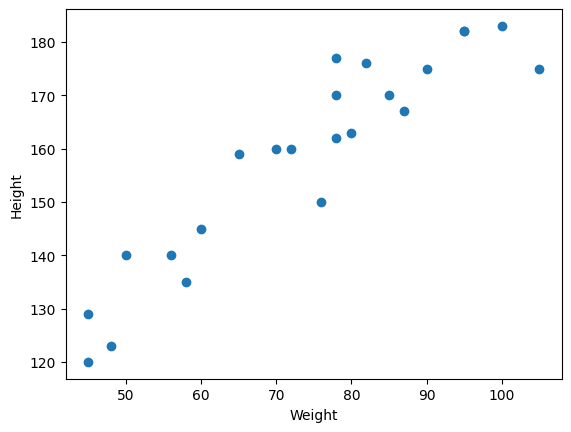

In [50]:
#Data looks in plot scatter
plt.scatter(df['Weight'], df['Height'])
plt.xlabel("Weight")
plt.ylabel("Height")

Dependent and Independent Features

In [51]:
X = df[['Weight']]#Independent
y= df['Height']#Dependent

Train test split

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(X,y,test_size=0.20, random_state = 42)

In [53]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((18, 1), (5, 1), (18,), (5,))

**Sanderdization** of data

In [54]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [55]:
X_train# before scaling x train has wide range of values

,Weight
12,105
1,58
13,100
5,78
2,48
11,95
20,45
3,60
4,70
18,76


In [56]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [57]:
X_train # after scaling x train bound between -1 to 1 similarly for X_test

array([[ 1.73689094],
       [-0.92026952],
       [ 1.4542143 ],
       [ 0.21043706],
       [-1.48562281],
       [ 1.17153765],
       [-1.6552288 ],
       [-0.80719886],
       [-0.24184557],
       [ 0.0973664 ],
       [-1.37255215],
       [-1.03334018],
       [-0.12877492],
       [ 0.88886101],
       [ 0.43657837],
       [ 0.60618436],
       [ 0.71925502],
       [ 0.32350772]])

In [58]:
X_train.shape, X_test.shape

((18, 1), (5, 1))

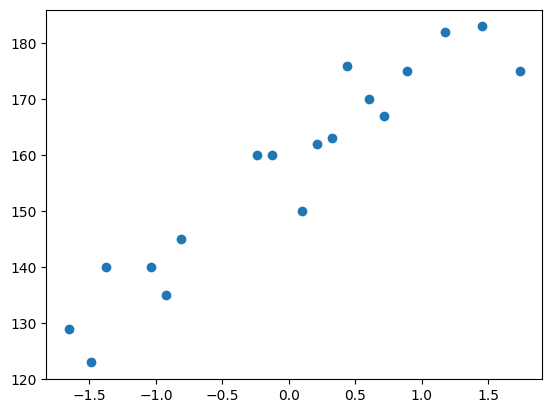

In [59]:
plt.scatter(X_train, y_train )

Train Simple Linear Regression Model

In [60]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [61]:
regressor.fit(X_train,  y_train)
y_pred  =  regressor.predict(X_test)


In [62]:
#One dependent and one independent features
print("Slope of coefficient of weight is :",regressor.coef_)
print("Intercept of line passing to y axis ",regressor.intercept_ )


Slope of coefficient of weight is : [17.03440872]
Intercept of line passing to y axis  157.5


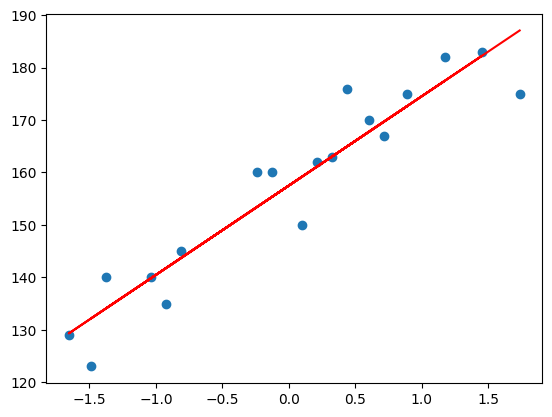

In [63]:
plt.scatter(X_train, y_train)
plt.plot(X_train, regressor.predict(X_train), 'r')

Prediction of test data

In [64]:
y_pred_test = regressor.predict(X_test)

In [65]:
y_pred_test, y_test

(array([161.08467086, 161.08467086, 129.3041561 , 177.45645118,
        148.56507414]),
 15    177
 9     170
 0     120
 8     182
 17    159
 Name: Height, dtype: int64)

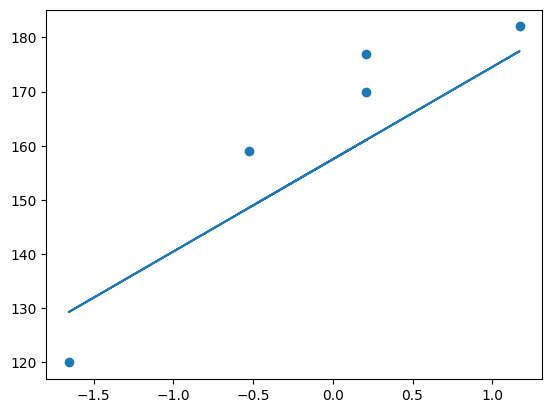

In [66]:
plt.scatter(X_test, y_test)
plt.plot(X_test, regressor.predict(X_test))

Performance Matrics
1. MSE
2. MAE
3. RMSE
4. R square
5. Adjusted R square

In [67]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
print("MSE: ",mse )
print("MAE: ", mae)
print("RMSE: ",rmse)

MSE:  109.77592599051664
MAE:  9.822657814519232
RMSE:  10.477400726827081


In [68]:
score = r2_score(y_test, y_pred_test)
score

0.776986986042344

In [69]:
adjustedr2Score = 1-(1-score)*(len(y_test)-1)/(len(y_test)- X_test.shape[1] -1)
adjustedr2Score

0.7026493147231252

New Datapoint 

In [70]:
scaled_weight = scaler.transform(pd.DataFrame([[85]], columns=['Weight']))
scaled_weight

array([[0.60618436]])

In [71]:
print("Predictioin for weight 80kg for height is : ",regressor.predict(scaled_weight))

Predictioin for weight 80kg for height is :  [167.82599217]


In [72]:
residuals = y_test- y_pred_test
residuals

15    15.915329
9      8.915329
0     -9.304156
8      4.543549
17    10.434926
Name: Height, dtype: float64

C:\Users\shiva\AppData\Local\Temp\ipykernel_34724\425804059.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals,  kde = True)


<Axes: xlabel='Height', ylabel='Density'>

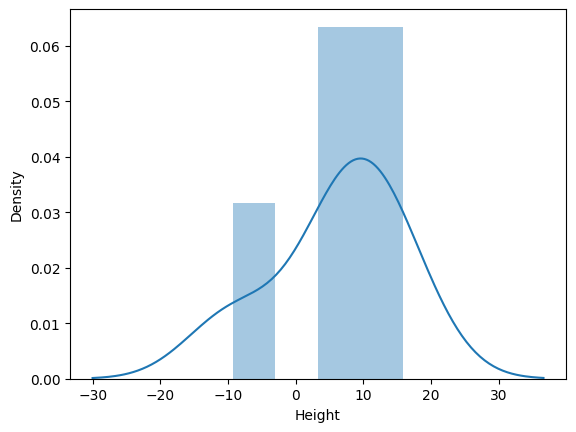

In [74]:
import seaborn as sns
sns.distplot(residuals,  kde = True)